In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.17.1


In [3]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Financial_Market_Data.csv', parse_dates=['Data'])

date_column = df['Data'].copy()

# 2. Remove Date and target columns
features = df.drop(['Data', 'Y'], axis=1)

# 3. Scale the features
scaler = StandardScaler()
scaled_features = pd.DataFrame(
    scaler.fit_transform(features),
    columns=features.columns
)

# 4. Add back the Date column
scaled_features.insert(0, 'Data', date_column)

scaled_features.head()

,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,2000-01-11,-1.424377,0.116941,-0.432277,-1.289247,0.846232,-0.058102,0.359670,-1.349527,0.290316,...,-1.052589,-1.529483,-1.782480,-0.273397,0.956041,1.028789,-1.061289,-1.419419,-1.173857,-0.793990
1,2000-01-18,-1.415478,0.019602,-0.423848,-1.175690,0.960528,-0.088487,0.321978,-1.230558,0.174552,...,-1.045280,-1.526739,-1.782480,-0.255250,1.040230,1.045740,-0.991858,-1.385836,-1.149828,-0.857078
2,2000-01-25,-1.416489,0.282989,-0.442193,-1.143014,1.008884,-0.044078,0.378516,-1.252575,0.350514,...,-1.038654,-1.523470,-1.782480,-0.316639,0.894944,0.949983,-1.030691,-1.444539,-1.135224,-0.868402
3,2000-02-01,-1.425389,0.443312,-0.470454,-1.148729,1.229563,0.096943,0.194769,-1.254892,0.400292,...,-1.015763,-1.524916,-1.801373,-0.317527,1.025317,1.111444,-1.075649,-1.494479,-1.124171,-0.915718
4,2000-02-08,-1.393734,0.789723,-0.487312,-1.169535,1.168019,0.209916,0.194769,-1.262618,0.145611,...,-1.031409,-1.505969,-1.801373,-0.279370,1.288948,1.248754,-0.971646,-1.440592,-1.073498,-0.914505


In [4]:
df = scaled_features
df.head()

,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,2000-01-11,-1.424377,0.116941,-0.432277,-1.289247,0.846232,-0.058102,0.359670,-1.349527,0.290316,...,-1.052589,-1.529483,-1.782480,-0.273397,0.956041,1.028789,-1.061289,-1.419419,-1.173857,-0.793990
1,2000-01-18,-1.415478,0.019602,-0.423848,-1.175690,0.960528,-0.088487,0.321978,-1.230558,0.174552,...,-1.045280,-1.526739,-1.782480,-0.255250,1.040230,1.045740,-0.991858,-1.385836,-1.149828,-0.857078
2,2000-01-25,-1.416489,0.282989,-0.442193,-1.143014,1.008884,-0.044078,0.378516,-1.252575,0.350514,...,-1.038654,-1.523470,-1.782480,-0.316639,0.894944,0.949983,-1.030691,-1.444539,-1.135224,-0.868402
3,2000-02-01,-1.425389,0.443312,-0.470454,-1.148729,1.229563,0.096943,0.194769,-1.254892,0.400292,...,-1.015763,-1.524916,-1.801373,-0.317527,1.025317,1.111444,-1.075649,-1.494479,-1.124171,-0.915718
4,2000-02-08,-1.393734,0.789723,-0.487312,-1.169535,1.168019,0.209916,0.194769,-1.262618,0.145611,...,-1.031409,-1.505969,-1.801373,-0.279370,1.288948,1.248754,-0.971646,-1.440592,-1.073498,-0.914505


In [5]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(888, 43) (223, 43)


In [6]:
scaled_features.drop('Data', axis=1)

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,-1.424377,0.116941,-0.432277,-1.289247,0.846232,-0.058102,0.359670,-1.349527,0.290316,2.345088,...,-1.052589,-1.529483,-1.782480,-0.273397,0.956041,1.028789,-1.061289,-1.419419,-1.173857,-0.793990
1,-1.415478,0.019602,-0.423848,-1.175690,0.960528,-0.088487,0.321978,-1.230558,0.174552,2.409601,...,-1.045280,-1.526739,-1.782480,-0.255250,1.040230,1.045740,-0.991858,-1.385836,-1.149828,-0.857078
2,-1.416489,0.282989,-0.442193,-1.143014,1.008884,-0.044078,0.378516,-1.252575,0.350514,2.313680,...,-1.038654,-1.523470,-1.782480,-0.316639,0.894944,0.949983,-1.030691,-1.444539,-1.135224,-0.868402
3,-1.425389,0.443312,-0.470454,-1.148729,1.229563,0.096943,0.194769,-1.254892,0.400292,2.134571,...,-1.015763,-1.524916,-1.801373,-0.317527,1.025317,1.111444,-1.075649,-1.494479,-1.124171,-0.915718
4,-1.393734,0.789723,-0.487312,-1.169535,1.168019,0.209916,0.194769,-1.262618,0.145611,1.971591,...,-1.031409,-1.505969,-1.801373,-0.279370,1.288948,1.248754,-0.971646,-1.440592,-1.073498,-0.914505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1.497764,0.867021,0.005523,-0.890078,0.123178,0.164727,-0.912427,-0.113874,0.035636,-1.342860,...,1.781110,1.759206,1.723278,3.142187,1.560758,2.073760,-0.234767,0.108805,2.473954,2.300980
1107,1.412004,0.763956,-0.077773,-0.884629,0.207669,0.287049,-0.931744,-0.006107,-0.044241,-1.306953,...,1.788943,1.736163,1.670110,3.192590,1.678141,2.107362,-0.271440,0.149513,2.461125,2.218884
1108,1.528751,1.156174,-0.083227,-0.870486,0.123090,0.255105,-0.883215,-0.053231,-0.216730,-1.345746,...,1.807211,1.761959,1.734239,3.363323,1.744049,2.049008,-0.216624,0.082013,2.457967,2.345061
1109,1.527558,1.233472,-0.059428,-0.836822,0.080624,0.201346,-0.923263,-0.020399,-0.386903,-1.370448,...,1.804879,1.769405,1.730324,3.466292,1.748859,2.061209,-0.225549,0.105527,2.415978,2.202708


In [7]:
bdiy_series = scaled_features.squeeze()
type(scaled_features)

pandas.core.frame.DataFrame

In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [9]:
# Assuming 'Feature1' is the target column
time_steps = 30

X_train, y_train = create_dataset(train[['VIX']], train.VIX, time_steps)
X_test, y_test = create_dataset(test[['VIX']], test.VIX, time_steps)

print(X_train.shape)

(858, 30, 1)


In [10]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

model = Sequential([
    LSTM(128, input_shape=(timesteps, num_features)),
    Dropout(0.2),
    RepeatVector(timesteps),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(num_features))
])

model.compile(loss='mae', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 30, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=95, mode='min')

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks = [es],
    shuffle=False
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5011 - val_loss: 0.4797
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4724 - val_loss: 0.4090
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4752 - val_loss: 0.4122
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4677 - val_loss: 0.4092
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4677 - val_loss: 0.4063
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4642 - val_loss: 0.4140
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4559 - val_loss: 0.4027
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4588 - val_loss: 0.4050
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4610 - val_loss: 0.4082
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4525 - val_loss: 0.3993
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4515 - val_loss: 0.3988
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

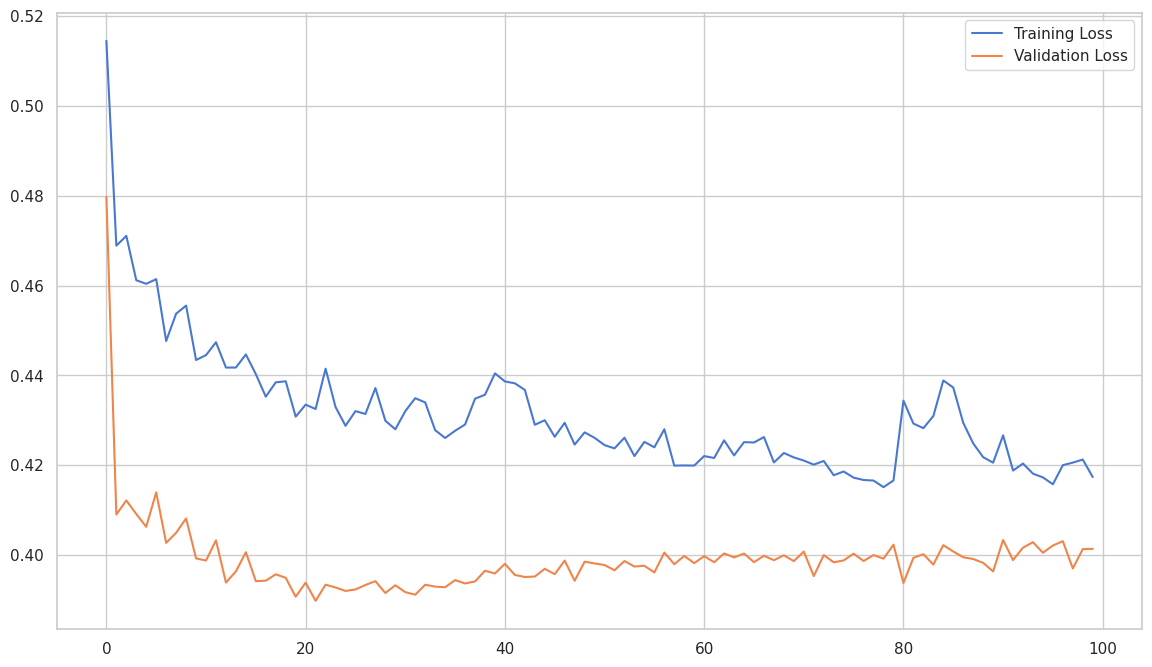

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

In [14]:
X_train_pred = model.predict(X_train)

train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis=1), columns=['Error'])

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [15]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4738 


0.5582531094551086

<ipython-input-16-0625a7148ea6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_mae_loss, bins=50, kde=True)


<Axes: ylabel='Density'>

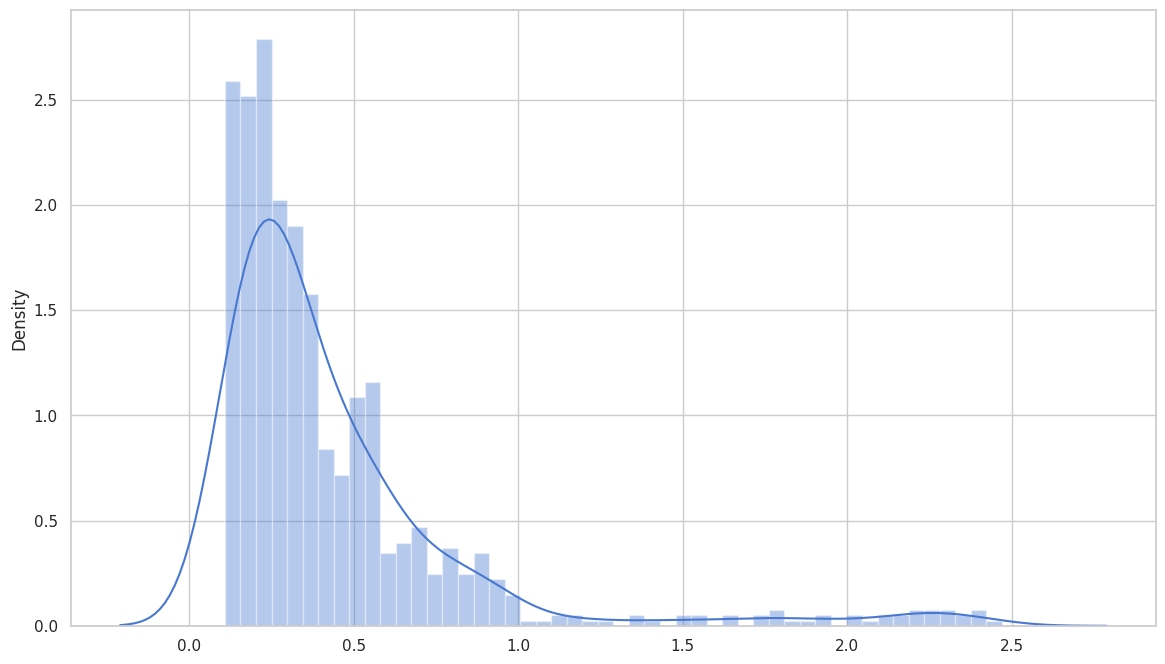

In [16]:
sns.distplot(train_mae_loss, bins=50, kde=True)

In [17]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<ipython-input-18-10a354135bb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_mae_loss, bins=50, kde=True)


<Axes: ylabel='Density'>

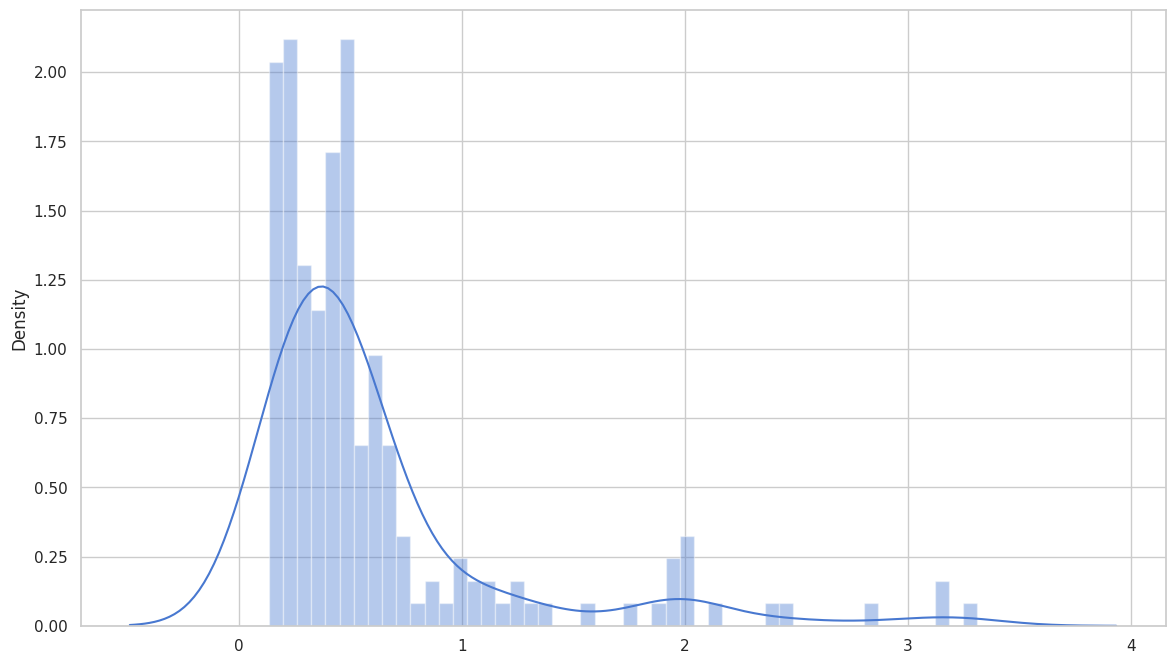

In [18]:
sns.distplot(test_mae_loss, bins=50, kde=True)

In [23]:
THRESHOLD = 0.65

test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['VIX'] = test[time_steps:].VIX

In [24]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,loss,threshold,anomaly
945,2018-02-20,0.691880,1.940609,-0.566641,-0.755746,-0.107173,0.051754,-0.799351,0.046039,0.070365,...,1.404896,0.980576,1.307358,0.418036,0.080374,1.326312,1.649067,0.698653,0.65,True
946,2018-02-27,0.663725,1.937746,-0.531439,-0.730485,-0.050992,0.060325,-0.837043,0.088914,-0.162321,...,1.440146,1.012328,1.392313,0.442741,0.173563,1.374938,1.684251,0.656079,0.65,True
951,2018-04-03,0.701022,1.110367,-0.616718,-0.762501,-0.064620,-0.012913,-0.771083,0.108227,0.128247,...,1.266548,0.795842,1.110544,0.338606,0.024213,1.289159,1.494177,0.693698,0.65,True
952,2018-04-10,0.712187,0.798311,-0.637542,-0.705268,-0.118515,0.048638,-0.728679,0.185479,0.055316,...,1.325531,0.952193,1.194150,0.265312,-0.238129,1.331740,1.585170,0.717975,0.65,True
953,2018-04-17,0.726973,0.761094,-0.598869,-0.672021,-0.124757,0.026823,-0.662719,0.224492,-0.548972,...,1.393524,0.987312,1.194300,0.260880,-0.189360,1.371780,1.469103,0.711450,0.65,True
